In [2]:
import pandas as pd 
import numpy as np 
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [3]:
dicom_data = pd.read_csv('/home/marwan/Documents/Semester 6/Image Processing/CBIS-DDSM/csv/dicom_info.csv')

In [4]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
dicom_data['BodyPartExamined'].count()

10237

In [6]:
dicom_data['BodyPartExamined'].unique()
dicom_data[dicom_data['BodyPartExamined'] == 'BREAST'].count()
dicom_data2 = dicom_data[dicom_data['BodyPartExamined'] == 'BREAST'].copy()

In [7]:
rows = []
for index, row in dicom_data2.iterrows():
    if '1-' in row['image_path']:
        rows.append(row)

df1 = pd.DataFrame(rows)

In [8]:
df1

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
6,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,16,16,BREAST,393,20160503,111620.055,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,44323,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,215032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26371...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.263713...,NaN,16,16,BREAST,371,20160426,120348.106,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.263713351013050806016...,1,30782,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.166079124139196773281...,214832.0
10231,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,NaN,16,16,BREAST,1297,20160503,134238.422,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.627982547125586065005...,1,0,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.310901637111684385906...,215523.0
10233,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...,NaN,16,16,BREAST,3316,20160426,123905.617,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.824512568105677732346...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.246896536912401556922...,132704.0
10234,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...,NaN,16,16,BREAST,2712,20160426,134551.632,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.247594800112988856209...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.150339554012064216510...,191922.0


In [9]:
len(dicom_data2['PatientID'].unique())

6424

In [10]:
df = dicom_data2.iloc[0]
df

file_path                                      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...
image_path                                     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
AccessionNumber                                                                              NaN
BitsAllocated                                                                                 16
BitsStored                                                                                    16
BodyPartExamined                                                                          BREAST
Columns                                                                                      351
ContentDate                                                                             20160426
ContentTime                                                                           131732.685
ConversionType                                                                               WSD
HighBit                       

In [11]:
df3 = df1.sort_values(by="StudyDate").groupby("PatientID").first().copy()

In [12]:
df4 = df3[df3['SeriesDescription'] == 'full mammogram images'].copy()

In [13]:
df4

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
PatientID,,,,,,,,,,,,,,,,,,,,,
Calc-Test_P_00141_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.31530...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.315301...,NaN,16,16,BREAST,3061,20160503,111223.425,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.315301970111463067215...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.178857961212194190028...,172801.0
Calc-Test_P_00141_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.59895...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.598950...,NaN,16,16,BREAST,3541,20160503,111230.152,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.598950139132034028135...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.270224245610185773912...,172805.0
Calc-Test_P_00331_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.78531...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.785313...,NaN,16,16,BREAST,3796,20160503,112929.330,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.785313273139219967260...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.274672961811964168041...,172949.0
Calc-Test_P_00390_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.67473...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.674731...,NaN,16,16,BREAST,2456,20160503,113414.339,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.674731236119592730371...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.422682780212684746129...,173018.0
Calc-Test_P_00390_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.35867...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.358679...,NaN,16,16,BREAST,2648,20160503,113417.517,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.358679916212113796016...,1,0,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.276360501116085581102...,173020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.39974...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,NaN,16,16,BREAST,2746,20160426,150315.274,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.964042733114858458386...,194200.0
Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17408...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,NaN,16,16,BREAST,3406,20160426,150337.775,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.268797464411367674311...,194206.0
Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41255...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,NaN,16,16,BREAST,3451,20160426,150346.261,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.791687062125620465047...,194209.0


In [14]:
df5 = df4.drop(['AccessionNumber', 'PatientBirthDate','PatientSex','ReferringPhysicianName','BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber', 'SecondaryCaptureDeviceManufacturerModelName', 'SeriesNumber', 'SmallestImagePixelValue', 'SpecificCharacterSet', 'StudyID', 'StudyInstanceUID', 'StudyTime', 'BodyPartExamined', 'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientName', 'PatientOrientation', 'PhotometricInterpretation', 'PixelRepresentation', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer', 'SeriesDescription', 'StudyDate'], axis = 'columns')

In [15]:
df5.isna().sum()

file_path            0
image_path           0
SeriesInstanceUID    0
dtype: int64

In [16]:
df5 = df5.dropna()

In [17]:
label = []

In [18]:
df5

,file_path,image_path,SeriesInstanceUID
PatientID,,,
Calc-Test_P_00141_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.31530...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.315301...,1.3.6.1.4.1.9590.100.1.2.315301970111463067215...
Calc-Test_P_00141_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.59895...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.598950...,1.3.6.1.4.1.9590.100.1.2.598950139132034028135...
Calc-Test_P_00331_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.78531...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.785313...,1.3.6.1.4.1.9590.100.1.2.785313273139219967260...
Calc-Test_P_00390_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.67473...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.674731...,1.3.6.1.4.1.9590.100.1.2.674731236119592730371...
Calc-Test_P_00390_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.35867...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.358679...,1.3.6.1.4.1.9590.100.1.2.358679916212113796016...
...,...,...,...
Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.39974...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...
Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17408...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...
Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41255...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...


In [19]:
calc_train = pd.read_csv('/home/marwan/Documents/Semester 6/Image Processing/CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_test = pd.read_csv('/home/marwan/Documents/Semester 6/Image Processing/CBIS-DDSM/csv/calc_case_description_train_set.csv')
mass_test = pd.read_csv('/home/marwan/Documents/Semester 6/Image Processing/CBIS-DDSM/csv/mass_case_description_test_set.csv')
mass_train = pd.read_csv('/home/marwan/Documents/Semester 6/Image Processing/CBIS-DDSM/csv/mass_case_description_train_set.csv')

all_df = calc_train.append(calc_test).append(mass_test).append(mass_train)

/tmp/ipykernel_25872/665380182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = calc_train.append(calc_test).append(mass_test).append(mass_train)
/tmp/ipykernel_25872/665380182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = calc_train.append(calc_test).append(mass_test).append(mass_train)


In [20]:
calc_train.shape

(1546, 14)

In [21]:
calc_test.shape

(1546, 14)

In [22]:
mass_test.shape

(378, 14)

In [23]:
mass_train.shape

(1318, 14)

In [24]:
all_df.shape

(4788, 17)

In [25]:
all_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast_density,mass shape,mass margins
0,P_00005,3.0,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
1,P_00005,3.0,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,NaN,NaN,NaN
2,P_00007,4.0,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN
3,P_00007,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
4,P_00008,1.0,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN


In [26]:
all_df[all_df['image file path'].str.contains('1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771')]

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast_density,mass shape,mass margins
163,P_00232,4.0,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,4,MALIGNANT,1,Calc-Training_P_00232_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00232_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00232_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
163,P_00232,4.0,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,4,MALIGNANT,1,Calc-Training_P_00232_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00232_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00232_RIGHT_CC_1/1.3.6.1.4.1.9...,NaN,NaN,NaN


In [27]:
dic = {}
for index, row in all_df.iterrows():
    dic[row['image file path'].split('/')[2]] = row['pathology']
print(dic)

{'1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548': 'MALIGNANT', '1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727': 'MALIGNANT', '1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297': 'BENIGN', '1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446': 'BENIGN', '1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.14784689311239808604822345534163797907': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.271665327610523966032056303433070740031': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.138089954813057214218822588283956286942': 'BENIGN_WITHOUT_CALLBACK', '1.3.6.1.4.1.9590.100.1.2.389208391412680785736990872734216560014': 'BENIGN', '1.3.6.1.4.1.9590.100.1.2.1211772871

In [28]:
df6 = df5.copy()

In [29]:
label = []
for i in df5['SeriesInstanceUID']:
    try: 
        label.append(dic[i])
    except:
        df6.drop(df5.index[df5['SeriesInstanceUID'] == i], inplace=True)

In [30]:
df6

,file_path,image_path,SeriesInstanceUID
PatientID,,,
Calc-Training_P_00005_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.47414...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...
Calc-Training_P_00005_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.25059...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...
Calc-Training_P_00007_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.22869...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...
Calc-Training_P_00007_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10474...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...
Calc-Training_P_00008_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.40672...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...
...,...,...,...
Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.39974...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...
Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17408...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...
Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41255...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...


In [31]:
label

['MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN_WITHOUT_CALLBACK',
 'BENIGN_WITHOUT_CALLBACK',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'MALIGNANT',
 'BENIGN',
 'BENIGN',
 'BENIGN_WITH

In [32]:
len(label)

2819

In [33]:
set(label)

{'BENIGN', 'BENIGN_WITHOUT_CALLBACK', 'MALIGNANT'}

In [34]:
df6['Label'] = label

In [35]:
df6

,file_path,image_path,SeriesInstanceUID,Label
PatientID,,,,
Calc-Training_P_00005_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.47414...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...,MALIGNANT
Calc-Training_P_00005_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.25059...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...,MALIGNANT
Calc-Training_P_00007_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.22869...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...,BENIGN
Calc-Training_P_00007_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10474...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...,BENIGN
Calc-Training_P_00008_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.40672...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...,BENIGN_WITHOUT_CALLBACK
...,...,...,...,...
Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.39974...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,MALIGNANT
Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17408...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,MALIGNANT
Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41255...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,MALIGNANT


In [38]:
import seaborn as sns


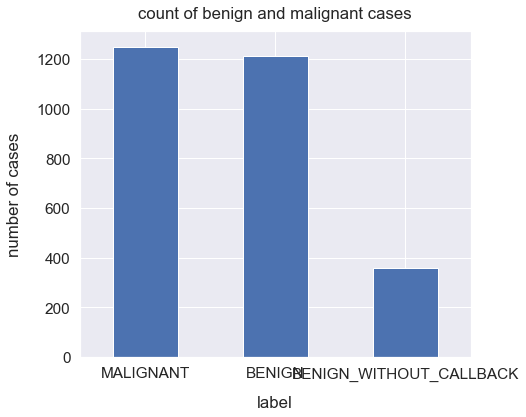

In [40]:
sns.set(font_scale=1.4)
df6['Label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("label", labelpad=14)
plt.ylabel("number of cases", labelpad=14)
plt.title("count of benign and malignant cases", y=1.02);

In [41]:
df6['Label'].unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [42]:
df6.drop(df6.index[df6['Label'] == 'BENIGN_WITHOUT_CALLBACK'], inplace=True)

In [43]:
df6

,file_path,image_path,SeriesInstanceUID,Label
PatientID,,,,
Calc-Training_P_00005_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.47414...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...,MALIGNANT
Calc-Training_P_00005_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.25059...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...,MALIGNANT
Calc-Training_P_00007_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.22869...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...,BENIGN
Calc-Training_P_00007_LEFT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10474...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...,BENIGN
Calc-Training_P_00011_LEFT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38920...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.389208...,1.3.6.1.4.1.9590.100.1.2.389208391412680785736...,BENIGN
...,...,...,...,...
Mass-Training_P_02033_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.39974...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.399742...,1.3.6.1.4.1.9590.100.1.2.399742535611893168217...,MALIGNANT
Mass-Training_P_02079_RIGHT_CC,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17408...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.174087...,1.3.6.1.4.1.9590.100.1.2.174087037012311934636...,MALIGNANT
Mass-Training_P_02079_RIGHT_MLO,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41255...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.412558...,1.3.6.1.4.1.9590.100.1.2.412558050811722685411...,MALIGNANT


In [36]:
path = "/home/marwan/Documents/Semester 6/Image Processing/"

In [37]:
im = []
for image in df6["image_path"]:
    img = np.array(Image.open( os.path.join(path, image) ))

KeyboardInterrupt: 

In [17]:
im

[]